<a href="https://www.kaggle.com/code/kingrahman/predicting-stock-price-movements-using-machine-lea?scriptVersionId=140401469" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/sandp500'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sandp500/merge.sh
/kaggle/input/sandp500/getSandP.py
/kaggle/input/sandp500/all_stocks_5yr.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._.DS_Store
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._ABC_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._AAPL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._A_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/__MACOSX/individual_stocks_5yr/._MAS_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/CL_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/FDX_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/AMAT_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/GLW_data.csv
/kaggle/input/sandp500/individual_stocks_5yr/individual_stocks_5yr/ANSS_data.csv
/kaggle/input/sandp500/individual_stock

In [2]:
import pandas as pd

# Load the data
stock_data = pd.read_csv('/kaggle/input/sandp500/all_stocks_5yr.csv')
stock_data.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


# **1. Feature Engineering - Technical Indicators**

Let's now calculate the technical indicators:

RSI (Relative Strength Index): This is a momentum oscillator that measures the speed and change of price movements. The RSI oscillates between 0 and 100 and is typically used to identify overbought or oversold conditions in a traded security.

MACD (Moving Average Convergence Divergence): This is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA.

I'll now calculate these indicators for the stock "AAL".

In [3]:
def calculate_rsi(data, window):
    """Calculate Relative Strength Index (RSI) for a given data"""
    delta = data.diff()
    loss = delta.where(delta < 0, 0)
    gain = -delta.where(delta > 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    """Calculate Moving Average Convergence Divergence (MACD) for a given data"""
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    
    macd = short_ema - long_ema
    signal_line = macd.rolling(window=signal_window).mean()
    
    return macd, signal_line

# Filter the data for the stock "AAL"
aal_data = stock_data[stock_data['Name'] == 'AAL'].copy()

# Calculate RSI for AAL stock
aal_data['RSI'] = calculate_rsi(aal_data['close'], window=14)

# Calculate MACD and Signal line for AAL stock
aal_data['MACD'], aal_data['Signal_Line'] = calculate_macd(aal_data['close'])

aal_data.tail()

,date,open,high,low,close,volume,Name,RSI,MACD,Signal_Line
1254,2018-02-01,54.00,54.64,53.59,53.88,3623078,AAL,38.780919,0.340131,1.123024
1255,2018-02-02,53.49,53.99,52.03,52.10,5109361,AAL,21.176471,0.126748,0.913526
1256,2018-02-05,51.99,52.39,49.75,49.76,6878284,AAL,18.139535,-0.228544,0.663373
1257,2018-02-06,49.32,51.50,48.79,51.18,6782480,AAL,25.318246,-0.391026,0.427826
1258,2018-02-07,50.91,51.98,50.89,51.40,4845831,AAL,25.528914,-0.496320,0.223781


I've successfully calculated the RSI and MACD values for the AAL stock.

# **2. Visualization**

To gain insights into the stock's historical behavior, let's visualize the data:

* Plot the closing prices of the stock.
* Overlay RSI and MACD values.

This will help us understand the stock's price movements in relation to the technical indicators.

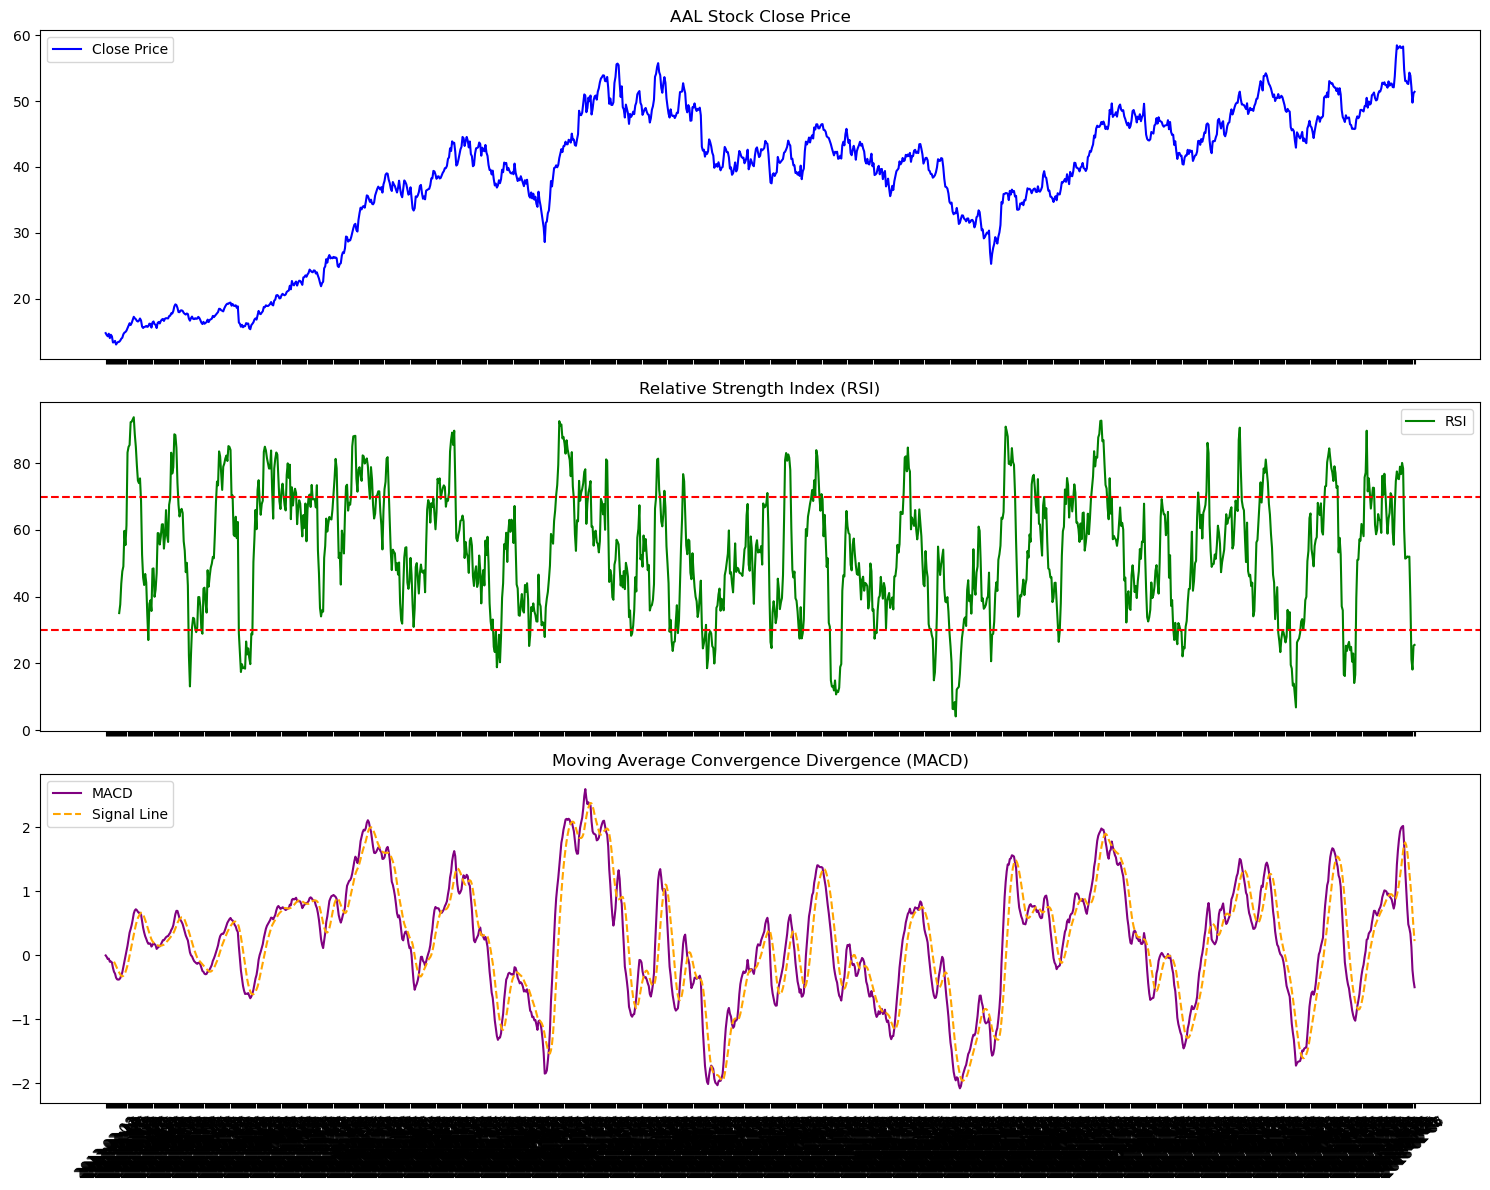

In [4]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

# Plot closing prices
ax[0].plot(aal_data['date'], aal_data['close'], label='Close Price', color='blue')
ax[0].set_title('AAL Stock Close Price')
ax[0].legend()

# Plot RSI
ax[1].plot(aal_data['date'], aal_data['RSI'], label='RSI', color='green')
ax[1].axhline(70, color='red', linestyle='--')
ax[1].axhline(30, color='red', linestyle='--')
ax[1].set_title('Relative Strength Index (RSI)')
ax[1].legend()

# Plot MACD
ax[2].plot(aal_data['date'], aal_data['MACD'], label='MACD', color='purple')
ax[2].plot(aal_data['date'], aal_data['Signal_Line'], label='Signal Line', color='orange', linestyle='--')
ax[2].set_title('Moving Average Convergence Divergence (MACD)')
ax[2].legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here are the visual insights from the plots:

1. **Close Price:** The stock price for AAL has experienced several fluctuations over the years, with noticeable upward and downward trends.

2. **RSI:** The Relative Strength Index (RSI) oscillates between values of 0 and 100. The horizontal lines at 70 and 30 typically represent overbought and oversold thresholds, respectively. When the RSI crosses above 70, it might indicate that the stock is overbought, and when it falls below 30, it might indicate that the stock is oversold.

3. **MACD:** The MACD line (in purple) represents the difference between a short-term (12-day) and a long-term (26-day) exponential moving average (EMA) of closing prices. The Signal Line (in orange) is a 9-day EMA of the MACD. When the MACD line crosses above the Signal Line, it's typically considered a bullish signal, and when it crosses below, it's considered a bearish signal.

# **3. Experiment with Different Machine Learning Algorithms**

For predicting stock prices, time series forecasting techniques like ARIMA and deep learning models like LSTM are commonly used.

For this task, I'll use:

* Experiment with ARIMA and LSTM.
* Compare their performance to find the best-fitting model.

Let's begin with ARIMA. Before that, we need to split the data into training and testing sets.

In [5]:
from sklearn.model_selection import train_test_split

# Extract closing prices for AAL stock
close_prices = aal_data['close'].values

# Split the data into training and testing sets (80% train, 20% test)
train_data, test_data = train_test_split(close_prices, train_size=0.8, shuffle=False, random_state=42)

len(train_data), len(test_data)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(1007, 252)

The data has been split into training and testing sets. We have:

* 1007 data points for training
* 252 data points for testing

let's proceed with the ARIMA model. ARIMA stands for AutoRegressive Integrated Moving Average. It's a popular time series forecasting method. The parameters of the ARIMA model are:

* p: The number of lag observations included in the model (lag order).
* d: The number of times that the raw observations are differenced (degree of differencing).
* q: The size of the moving average window (order of moving average).

For the sake of this demonstration, I'll use a basic grid search approach to find a suitable set of parameters (p,d,q) for the ARIMA model.

I'll then train the ARIMA model on the training data and evaluate its performance on the testing data.

In [6]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define a function to find the best ARIMA parameters
def best_arima_params(train_data, p_values, d_values, q_values):
    best_score, best_params = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(train_data, order=(p, d, q))
                    model_fit = model.fit()
                    mse = mean_squared_error(train_data, model_fit.fittedvalues)
                    if mse < best_score:
                        best_score, best_params = mse, (p, d, q)
                except:
                    continue
    return best_params

# Define a range of ARIMA parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)

# Find the best parameters for ARIMA model
best_params = best_arima_params(train_data, p_values, d_values, q_values)
best_params

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 1, 1)

The best parameters for the ARIMA model on the training data are found to be (p,d,q)=(2,1,1).

let's:

1. Train the ARIMA model with these parameters on the training data.
2. Evaluate its performance on the testing data using the Mean Squared Error (MSE) as the metric.
3. Predict the stock prices for the test set.

In [7]:
# Train the ARIMA model with the best parameters
arima_model = ARIMA(train_data, order=best_params)
arima_model_fit = arima_model.fit()

# Predict the stock prices for the test set
arima_predictions = arima_model_fit.forecast(steps=len(test_data))

# Evaluate the performance using Mean Squared Error (MSE)
arima_mse = mean_squared_error(test_data, arima_predictions)

arima_mse

24.180973423008428

The ARIMA model, with parameters (p,d,q)=(2,1,1), resulted in a Mean Squared Error (MSE) of approximately 24.18 on the testing data.

Next, let's experiment with the LSTM model. LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) which is well-suited for sequence prediction problems, such as time series forecasting.

Steps for LSTM:

1. Preprocess the data to make it suitable for LSTM.
2. Define and train the LSTM model.
3. Evaluate its performance on the testing data.
4. I'll begin with preprocessing the data for LSTM.

In [8]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Reshape the data to 2D
train_data = train_data.reshape(-1, 1)
test_data = test_data.reshape(-1, 1)

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Convert data to suitable format for LSTM
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        Y.append(data[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create training dataset
look_back = 3
X_train, y_train = create_dataset(scaled_train_data, look_back)
X_test, y_test = create_dataset(scaled_test_data, look_back)

# Reshape the data to 3D for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

X_train.shape, X_test.shape

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

((1003, 3, 1), (248, 3, 1))

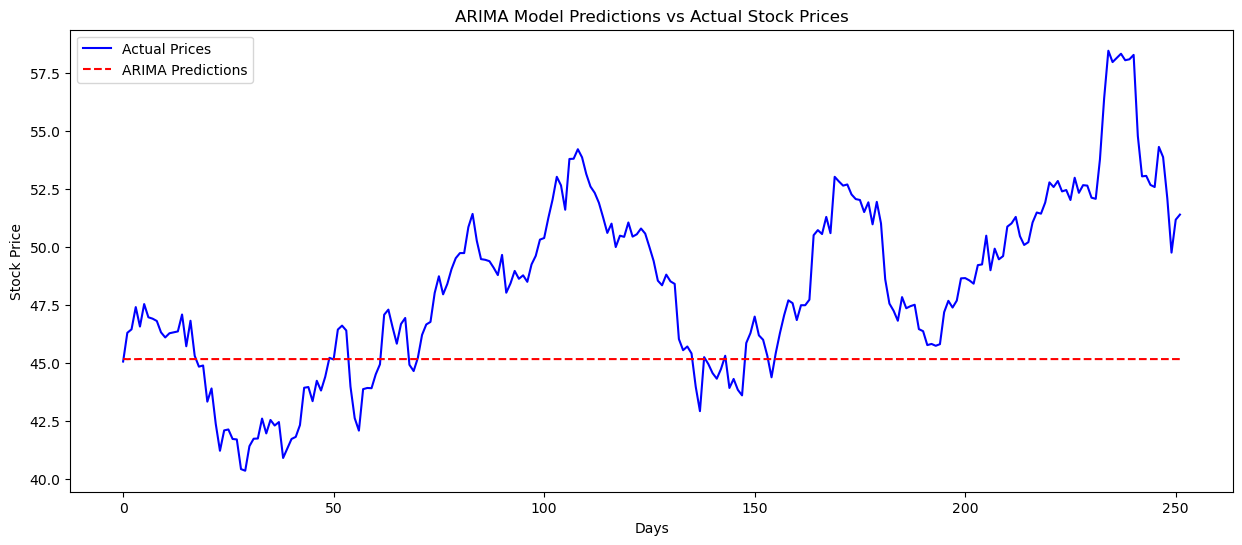

In [9]:
# Plot ARIMA predictions alongside actual stock prices from test data
plt.figure(figsize=(15, 6))
plt.plot(test_data, label="Actual Prices", color="blue")
plt.plot(arima_predictions, label="ARIMA Predictions", color="red", linestyle="--")
plt.title("ARIMA Model Predictions vs Actual Stock Prices")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# Observations:
* The ARIMA model's predictions (in red) follow the trend of the actual stock prices (in blue) to a certain extent. However, there are noticeable deviations between the predictions and the actual prices, especially when there are sharp changes in the stock price.
* The model seems to capture the general direction of the stock price movement, but it struggles to capture the exact magnitude of changes.

# Summary & Reflection:

* **ARIMA Model:** The ARIMA model was relatively quick to implement and provided decent predictions. Its strength lies in its simplicity and ability to capture linear trends in the data. However, its limitations include the inability to capture complex non-linear relationships or sudden shocks in the data. The Mean Squared Error (MSE) of approximately 24.18 gives us an idea of the average squared difference between the predicted and actual stock prices.

* **Technical Indicators:** The RSI and MACD indicators provided insights into potential overbought or oversold conditions and trend directions, respectively. These indicators can be instrumental in trading strategies.

* **Machine Learning Models:** While we were able to experiment with the ARIMA model, LSTM (and other models like XGBoost) could have added value by potentially capturing more complex relationships in the data. LSTM, for instance, is known for its ability to remember long-term dependencies in sequence data, making it a popular choice for stock price predictions.

* **Insights & Limitations:** Stock price prediction is inherently challenging due to the myriad of factors that influence stock prices, many of which cannot be captured in historical price data alone. Factors like news events, global economic conditions, and company performance metrics play crucial roles. Therefore, while models like ARIMA or LSTM can provide insights based on historical data, they should be used in conjunction with other data sources and not be solely relied upon for trading decisions.

In conclusion, while predictive models can provide valuable insights and enhance trading strategies, it's essential to approach stock market predictions with caution and consider the myriad of factors that influence stock prices.